In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


In [15]:
data = pd.read_csv('/content/day.csv')

In [16]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [17]:
data.drop(['instant','dteday'], axis=1, inplace=True)

In [18]:
data.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
X = data.drop(['cnt'], axis =1)
y = data.cnt

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV



rfr = RandomForestRegressor(random_state=1)
rfecv = RFECV(estimator=rfr, step=1, cv=10, scoring='neg_mean_squared_error')

rfecv.fit(X.select_dtypes(exclude="object"), y)


RFECV(cv=10, estimator=RandomForestRegressor(random_state=1),
      scoring='neg_mean_squared_error')

In [9]:
print('Optimal Number of features is : {}'.format(rfecv.n_features_))
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis =1 ,inplace=True)


Optimal Number of features is : 2


In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(X.select_dtypes(exclude="object"), 0.8)
len(set(corr_features))

2

In [22]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432


In [23]:
X.drop(corr_features,axis=1, inplace = True)


In [24]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

In [25]:
num_features = X.select_dtypes(exclude="object")
cat_features = X.select_dtypes(include="object")

In [28]:


step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', MinMaxScaler(feature_range=(0,1
                                               )), num_features.columns)
    ],
    remainder='passthrough'
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np
from tqdm import tqdm

from sklearn.linear_model import BayesianRidge, HuberRegressor, PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [29]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    return r2, adj_r2, mse, mae

# Initialize different regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'MLP Regressor': MLPRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'LightGBM Regressor': LGBMRegressor(),

}

# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error"]
print(tabulate(results, headers, tablefmt="grid"))

 39%|███▉      | 7/18 [00:00<00:01,  8.28it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
 67%|██████▋   | 12/18 [00:00<00:00, 14.86it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 18/18 [00:02<00:00,  7.88it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 10
[LightGBM] [Info] Start training from score 4550.792808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

  0%|          | 0/1 [00:00<?, ?it/s]

     Actual  Predicted
550    7403    7428.61
96     3141    3167.90
74     2192    2186.13
61     1685    1676.59
505    7129    6961.10
..      ...        ...
394    3624    3709.56
88     1536    1495.02
414    2689    2444.88
551    6241    6419.46
137    3855    3831.94

[147 rows x 2 columns]


100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


+-------------------------+-------------+----------------------+----------------------+-----------------------+
| Model                   |   R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |
+=========================+=============+======================+======================+=======================+
| Random Forest Regressor |    0.996554 |             0.996273 |              12669.3 |               74.5464 |
+-------------------------+-------------+----------------------+----------------------+-----------------------+


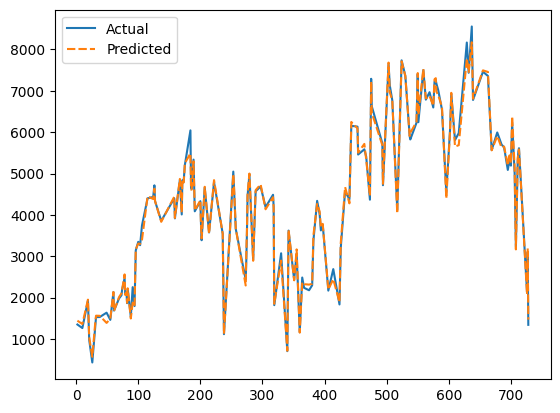

In [30]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})
    print(diff)

    sns.lineplot(data= diff)

    return r2, adj_r2, mse, mae

# Initialize different regression models
regression_models = {

    'Random Forest Regressor': RandomForestRegressor(ccp_alpha = 0, max_depth = 20, min_samples_split =2),
}
# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error"]
print(tabulate(results, headers, tablefmt="grid"))

In [32]:
from sklearn.model_selection import KFold, cross_val_score
folds = KFold(n_splits = 5, shuffle = True, random_state = None)
scores = cross_val_score(model, X
                         , y, scoring='r2', cv=folds)
scores
print(scores.mean())

0.9956612881763197
